<a href="https://colab.research.google.com/github/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/09-M%C3%A9todos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta notebook pondremos en práctica lo aprendido en las sesiones anteriores implementando algunos métodos numéricos. Concretamente:

* **Eliminación Gaussiana**: Iteración, argumentos por default, vectorización y slicing de numpy.
* **Regla de Simpson de aplicación multiple**: Evaluación de derivadas en simpy, slicing.
* **Métodos de Runge-Kutta para EDO**: Vectorización, clases y el tipo `None`. 

In [ ]:
import numpy as np

# 1. Eliminación Gaussiana

En todas las implementaciones, observar el argumento por default en el llamado a la función

<div>
<img src="https://github.com/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/img/eliminacion-gaussiana-1.png?raw=1" width="300"/>
</div>

<div>
<img src="https://github.com/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/img/eliminacion-gaussiana-2.png?raw=1" width="300"/>
</div>

Implementación usando vectorización de Numpy

In [ ]:
def eliminacion_gaussiana(A,b,resultados_parciales=False):
    '''
    Esta función calcula la solución de un sistema de ecuaciones Ax=b usando Eliminación Gaussiana para llevar la
    matriz A a su forma triangular superior y después realiza la sustitución hacia atrás.
    '''
    n = A.shape[0]
    assert b.shape[0] == n  # Aquí nos aseguramos que la forma de b sea compatible con la forma de A
    A = np.hstack((A,b.reshape(-1,1))) # Formamos la matriz aumentada del sistema
    if resultados_parciales: print("Inicial:\n", A) # Podemos escribir el if en una sola línea
    for k in range(n-1): # Recorremos cada columna
        for i in range(k+1,n): # Recorremos de la diagonal hacia adelante
            ratio = A[i,k]/A[k,k]
            A[i] = A[i]-ratio*A[k] # En este punto usamos la vectorización
            if resultados_parciales: print(A)
    if resultados_parciales: print("Forward elimination:\n",A)
    variables = A[:,n]
    for k in reversed(range(n)): # Realizamos la sustitución hacia atras
        for j in range(k+1,n):
            variables[k] = variables[k] - A[k,j]*variables[j] # Otra vez, usamos vectorización
        variables[k] = variables[k]/A[k,k]
    return variables

Ahora, incluyamos el pivoteo parcial. Esto lo hacemos manipulando los índices de los arreglos de numpy.

In [ ]:
def eliminacion_gaussiana_pp(A,b,resultados_parciales=False):
    '''
    Esta función calcula la solución de un sistema de ecuaciones Ax=b usando Eliminación Gaussiana con
    pivoteo parcial para llevar la matriz A a su forma triangular superior y después realiza la
    sustitución hacia atrás.
    '''
    n = A.shape[0]
    assert b.shape[0] == n
    A = np.hstack((A,b.reshape(-1,1))) # Formamos la matriz aumentada del sistema
    if resultados_parciales: print("Inicial:\n", A)
    for k in range(n-1):
        #------- Pivoteo parcial -------
        idx_max = np.argmax(np.abs(A[k:,k])) + k
        new_idxs = list(range(A.shape[0]))
        new_idxs[k] = idx_max
        new_idxs[idx_max] = k
        A = A[new_idxs]
        #--------------------------------
        if resultados_parciales: print("cambio de renglones:\n",A)
        for i in range(k+1,n):
            ratio = A[i,k]/A[k,k]
            A[i] = A[i]-ratio*A[k] # En este punto usamos la vectorización
            if resultados_parciales: print(A)
    if resultados_parciales: print("Forward elimination:\n",A)
    variables = A[:,n]
    for k in reversed(range(n)):
        for j in range(k+1,n):
            variables[k] = variables[k] - A[k,j]*variables[j] # Otra vez, usamos vectorización
        variables[k] = variables[k]/A[k,k]
    return variables

## Aspectos importantes

¿Cómo juntamos arreglos en uno solo?

In [ ]:
A = np.array([[3,2,1],[5,3,4],[1,1,-1]],dtype=float)
b = np.array([1,2,1],dtype=float)

print(A)
print(b.reshape(-1,1))
np.hstack((A,b.reshape(-1,1)))

¿Cómo intercambiamos dos líneas de un arreglo?

In [ ]:
A = np.array([[3,2,1],[5,3,4],[1,1,-1]],dtype=float)
print(A)
new_idxs = [2,1,0]
A = A[new_idxs]  # Aquí hacemos la permutación
print(A)

## Ejemplo 1

### Usando nuestra implementación

In [ ]:
A = np.array([[3,2,1],[5,3,4],[1,1,-1]],dtype=float)
b = np.array([1,2,1],dtype=float)
print(A,"\n\n",b)

In [ ]:
eliminacion_gaussiana(A,b)

In [ ]:
eliminacion_gaussiana_pp(A,b,resultados_parciales=True)

### Usando implementaciones de Python

Usando numpy.

In [ ]:
import numpy as np

np.linalg.solve(A,b)

In [ ]:
np.linalg.inv(A)@b

Usando [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide)

In [ ]:
import scipy

scipy.linalg.solve(A,b)

En el siguiente ejemplo vemos que, en general, necesitamos el método con pivoteo parcial

In [ ]:
A = np.array([[0,2,1],[5,0,4],[1,1,-1]],dtype=float)
b = np.array([1,2,1],dtype=float)
print(A,"\n\n",b,"\n")

print(f"Eliminación Gaussiana sin pivoteo parcial\n{eliminacion_gaussiana(A,b)}\n")
print(f"Eliminación Gaussiana con pivoteo parcial\n{eliminacion_gaussiana_pp(A,b)}\n")
print(f"Usando el solver de numpy\n{np.linalg.solve(A,b)}")

Comparemos el tiempo de ejecución de ambas opciones (la propia y la de Python):

In [ ]:
import time
import scipy

# --- opción 1 ---
inicio = time.time()
sol = eliminacion_gaussiana(A,b)
final = time.time()
print(f"Duración (EG): {final-inicio} segundos")

# --- opción 2 ---
inicio = time.time()
sol = eliminacion_gaussiana_pp(A,b)
final = time.time()
print(f"Duración (EGpp): {final-inicio} segundos")

# --- opción 3 ---
inicio = time.time()
sol = np.linalg.solve(A,b)
final = time.time()
print(f"Duración (numpy): {final-inicio} segundos")

# --- opción 4 ---
inicio = time.time()
sol = scipy.linalg.solve(A,b)
final = time.time()
print(f"Duración (scipy): {final-inicio} segundos")

Ahora, veamos con un ejemplo grande

In [ ]:
import numpy as np

np.random.seed(22)
Ab = np.random.normal(size=(200,201))

A = Ab[:,:-1].copy()
b = Ab[:,-1].copy()
print(f"Determinante de A: {np.linalg.det(A)}")

In [ ]:
import time
import scipy

# --- opción 2 ---
inicio = time.time()
sol = eliminacion_gaussiana_pp(A,b)
final = time.time()
print(f"Duración (EGpp): {final-inicio} segundos")

# --- opción 3 ---
inicio = time.time()
sol = np.linalg.solve(A,b)
final = time.time()
print(f"Duración (numpy): {final-inicio} segundos")

# --- opción 4 ---
inicio = time.time()
sol = scipy.linalg.solve(A,b)
final = time.time()
print(f"Duración (scipy): {final-inicio} segundos")

# 2. Regla de Simpson para integrar

Ahora, queremos aproximar el valor de una integral definida

$$I=\int_a^b f(x) dx$$

La regla de Simpson aproxima la función $f$ por medio de un polinomio de grado 2 que pasa por cada 3 puntos consecutivos de la discretización del intervalo $[a,b]$.

<div>
<img src="https://github.com/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/img/simpson-multiple.png?raw=1" width="500"/>
</div>

In [13]:
import sympy as sym

def simpson_compuesta(f_str:str,a:float,b:float,n):
    '''
    f_str:      Expresión como string de la función a integrar, la función debe estar 
                expresada en términos de 'x' 
    [a,b]:      Intervalo de integración
    n:          Número de subintervalos a considerar
    '''
    if a<=b and n%2==0: # Hay que verificar que el número de subintervalos sea par
        # --- Obtener la función de python 
        f = sym.lambdify(sym.symbols("x"), sym.sympify(f_str))
        # --- Cálculo de la aproximación a la integral ---
        nodos = np.linspace(a,b,n+1)
        indices_int_pares = [j for j in range(1,nodos.shape[0]-1) if j%2==0]
        indices_int_impares = [j for j in range(nodos.shape[0]) if (j-1)%2==0]
        suma_nodos_pares = np.sum(f(nodos[indices_int_pares]))
        suma_nodos_impares = np.sum(f(nodos[indices_int_impares]))
        aproximacion = (b-a)*(f(a)+4*suma_nodos_impares+2*suma_nodos_pares+f(b))/(3*n)
        resultado = {'aproximación': aproximacion}
        # --- Cálculo del error aproximado ---
        d3_f = sym.diff(sym.sympify(f_str), sym.symbols("x"), 3)
        d3_f = sym.lambdify(sym.symbols("x"), d3_f)
        prom_derivadas_cuartas = (d3_f(b)-d3_f(a))/(b-a)
        error_aprox = -(prom_derivadas_cuartas*(b-a)**5)/(180*n**4)
        resultado['error aproximado'] = error_aprox
        return resultado
    else:
        print("revisar los parámetros")

**Ejemplo:** Aproximemos el valor de la integral 

$$\int_0^3 4-0.5x-2x^2+0.5x^3+0.1 x^4 dx = 6.735$$

In [14]:
simpson_compuesta(f_str="4-0.5*x-2*x**2+0.5*x**3+0.1*x**4",
                  a=0,
                  b=3,
                  n=6)

{'aproximación': 6.737500000000001, 'error aproximado': -0.0024999999999999996}

## Aspectos importantes

¿Cómo accedemos a los nodos pares/impares interiores?

In [15]:
import numpy as np

v = np.array([4,4.5,5,5.5,6,6.5,7,7.5,8])
print(v)

indices_int_pares = [j for j in range(1,v.shape[0]-1) if j%2==0]
indices_int_impares = [j for j in range(v.shape[0]) if (j-1)%2==0]
print(f"Nodos interiores pares: {v[indices_int_pares]}")
print(f"Nodos interiores impares: {v[indices_int_impares]}")

[4.  4.5 5.  5.5 6.  6.5 7.  7.5 8. ]
Nodos interiores pares: [5. 6. 7.]
Nodos interiores impares: [4.5 5.5 6.5 7.5]


# 3. Métodos de Runge-Kutta

La siguiente es una implementación de los métodos de Runge-Kutta de orden 2, 3 y 4 en una clase. De esta forma, se considera como si el método estuviera *empaquetado* en un objeto que contiene métodos y atributos. Esto genera una implementación más versatil y limpia.

Recordar que, dentro de una clase:
* Una variable se llama **atributo**.
* Una función se llama **método**.

Observa la *keyword* `self`. Cuando se trabaja con clases en Python, el término "self" se refiere a la instancia de la clase que se está utilizando en el momento. Es habitual utilizar "self" como primer parámetro en los métodos de instancia de una clase. Esto le **permite modificar los atributos del objeto y ejecutar métodos de la instancia.

Por otro lado, observa la *keyword* `None`. Es un tipo de dato *nulo*, no es una string "". tampoco `0` o `False`. Son útiles, por ejemplo, para asignarlos como valor por defecto a argumentos que podemos o no recibir. 

Finalmente, observa el módulo Pandas ([documentación](https://pandas.pydata.org/docs/user_guide/index.html)). Sirve para presentar y manipular datos tabulares de forma eficiente y flexible.



El problema a resolver es la EDO
$$\frac{dy}{dx}=f(x,y)$$

<div>
<img src="https://github.com/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/img/rk-orden2.png?raw=1" width="600"/>
</div>

<div>
<img src="https://github.com/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/img/rk-orden3.png?raw=1" width="600"/>
</div>

<div>
<img src="https://github.com/gmauricio-toledo/Curso-Python-2023/blob/main/Notebooks/img/rk-orden4.png?raw=1" width="600"/>
</div>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class RungeKutta:
    '''
    Implementación de los métodos de Runge-Kutta de orden 2,3,4 para resolver EDOs escalares
    '''

    def __init__(self,f,sol=None,order=3,a_order2=None,name=None):
        '''
        Este método se llama "constructor" y es la función que se ejecuta cuando
        se inicializa el objeto, está función crea el objeto "en blanco".
        '''
        self.f = f  # Creamos un atributo de la clase que se llama "f"
        self.sol = sol
        assert order==2 or order==3 or order==4  # Verificamos que el orden sea 2, 3 o 4
        self.order = order 
        if name is not None:
            name_meaning_dict = {'Euler': 0,
                                 'Heun': 0.5,
                                 'Mid': 1,
                                 'Ralston': 2/3}
            if name in name_meaning_dict.keys():
                self.a2 = name_meaning_dict[name]
                self.__get_params()
                self.order = 2
            else:
                raise KeyError(f"Nombre no valido: {name}")
        else:
            if self.order == 2:
                assert a_order2 is not None
                self.a2 = a_order2
                self.__get_params()

    def __get_params(self):
        '''
        función que obtiene el resto de parametros de RK de orden 2 a partir del valor de a2
        '''
        self.a1 = 1-self.a2
        if self.a2!=0:
            self.p = 1/(2*self.a2)
        else:
            self.p = 1
        self.q = self.p

    def solve(self,a,b,h,x0,y0):
        assert a==x0        
        self.a = a
        self.b = b
        self.h = h
        n = int((b-a)/h)
        xs = np.linspace(a,b,n+1)
        ys = np.zeros_like(xs)
        ys[0] = y0
        for j in range(1,n+1):
            k1 = self.f(xs[j-1],ys[j-1])
            if self.order==2:
                k2 = self.f(xs[j-1]+self.p*h,ys[j-1]+self.q*k1*h)
                ys[j] = ys[j-1] + (self.a1*k1 + self.a2*k2)*h 
            else:
                k2 = self.f(xs[j-1]+0.5*h,ys[j-1]+0.5*k1*h)
                if self.order==3:
                    k3 = self.f(xs[j-1]+h,ys[j-1]-k1*h + 2*k2*h)
                    ys[j] = ys[j-1] + (1/6)*(k1 + 4*k2+k3)*h
                elif self.order==4:
                    k3 = self.f(xs[j-1]+0.5*h,ys[j-1] + 0.5*k2*h)
                    k4 = self.f(xs[j-1]+h,ys[j-1] + k3*h)
                    ys[j] = ys[j-1] + (1/6)*(k1 + 2*k2+2*k3+k4)*h
        self.xs = xs 
        self.ys = ys

    def plot(self,plot_nodes=True):
        xaxis = np.linspace(self.a,self.b,100)
        plt.figure(dpi=100)
        plt.plot(self.xs,self.ys,color='blue',label='Solución aprox')
        if plot_nodes:
            plt.scatter(self.xs,self.ys,color='blue')
        if self.sol is not None:
            plt.plot(xaxis,[self.sol(x) for x in xaxis],color='red',label='Solución real')
            plt.legend(loc='best')
        if self.h>0.2:
            plt.xticks(self.xs)
        plt.show()      

    def table(self,num_digits=4):
        if self.sol is not None:
            valores_reales = self.sol(self.xs)
            errores_relativos = (self.sol(self.xs) - self.ys)/self.sol(self.xs)
            datos = {'x': self.xs,
                     'y aprox': self.ys,
                     'y real': valores_reales,
                     'error relativo': errores_relativos}            
            self.reales = valores_reales
            self.ers = errores_relativos
        else:
            datos = {'x': self.xs,
                     'y aprox': self.ys
                     }            
        self.resultados = pd.DataFrame(datos)
        display(self.resultados)


**Ejemplo:** Aproximemos numéricamente la solución de la EDO

$$\frac{dy}{dx} = -2*x^3 + 12*x^2 - 20^x + 8.5$$

en $[0,4]$ con un tamaño de paso $h=0.5$ y una condición inicial $y(0)=1$.

In [6]:
f = lambda x,y: -2*x**3 + 12*x**2 - 20*x + 8.5
sol = lambda x:-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

a = 0
b = 4
h = 0.5
x0 = 0
y0 = 1

Probemos la clase. Al llamar al método `solve` aparentemente no hace nada.

In [23]:
solver = RungeKutta(f=f,
                    name='Heun',
                    sol=sol)

# Aquí accedemos a un método de la clase
solver.solve(a,b,h,x0,y0)

Accedamos a otros métodos de la clase

In [ ]:
solver.plot(plot_nodes=True)
solver.table()

Podemos acceder a los atributos también. Por ejemplo, los nodos usados en la discretización

In [15]:
solver.xs

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [16]:
solver.h

0.5

In [12]:
solver.resultados

,x,y aprox,y real,error relativo
0,0.0,1.0000,1.00000,0.000000
1,0.5,3.4375,3.21875,-0.067961
2,1.0,3.3750,3.00000,-0.125000
3,1.5,2.6875,2.21875,-0.211268
4,2.0,2.5000,2.00000,-0.250000
5,2.5,3.1875,2.71875,-0.172414
6,3.0,4.3750,4.00000,-0.093750
7,3.5,4.9375,4.71875,-0.046358
8,4.0,3.0000,3.00000,0.000000


Probemos diferentes combinaciones de parámetros de inicialización

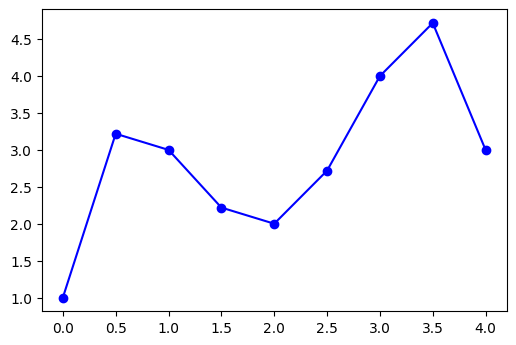

,x,y aprox
0,0.0,1.00000
1,0.5,3.21875
2,1.0,3.00000
3,1.5,2.21875
4,2.0,2.00000
5,2.5,2.71875
6,3.0,4.00000
7,3.5,4.71875
8,4.0,3.00000


In [22]:
# solver2 = RungeKutta(f=f,
#                     name='dgffsg',
#                     sol=sol)

# solver2 = RungeKutta(f=f,
#                     sol=sol,
#                     order=2,
#                     a_order2=0.3)

# solver2 = RungeKutta(f=f,
#                     sol=sol,
#                     order=4,
#                     a_order2=0.3)  # En este caso, ignora el 'a_order2'

solver2 = RungeKutta(f=f,
                    order=3) 

solver2.solve(a,b,h,x0,y0)
solver2.plot(plot_nodes=True)
solver2.table()